# Practice Final Solutions

### Reference Books

* __LL__: *Programming for Computations - Python* by Svein Linge and Hans Petter Langtangen, 2nd edition.
* __L__: *A Primer on Scientific Programming with Python* by Hans Petter Langtangen, 2nd edition.
* __TAK__: *Applied Scientific Computing With Python* by Peter R. Turner, Thomas Arildsen, and Kathleen Kavanagh.

### Topics

The final exam will focus on material not tested on the midterm. However, this class is cumulative, and it is necessary to understand earlier material as well. In particular, it is expected that students have developed a working knowledge of Python.

The following is a list of topics that may be explicitly tested on the final exam. See the [course's calendar page](http://wphooper.com/teaching/2020-fall-computation/calendar.php) for notebooks used in lecture and for where the material appears in the textbooks above.

* Basic math
* Lists (covered in the Plotting Graphs notebook)
* Closure (functions returning functions, covered in the plotting graphs notebook)
* Numerical differentiation
* Numerical integration
* Matrices and vectors
* Gaussian elimination
* LU Factorization
* Least squares
* Dictionaries
* Eigenvalues and Eigenvectors
* Random numbers (especially the use of `numpy.random.random_sample` or equivalently `numpy.random.random`)

### Sources of review

* The homework assignments and solutions.
* The textbooks listed above and exercises on the topics above.
* The notebooks available on the [Class' Calendar page](http://wphooper.com/teaching/2020-spring-computation/calendar.php)
* Class videos, available from Blackboard Collaborate.

### Exam format

The exam will be given similar to how quizzes have been given in the course. You will download notebooks from blackboard at specific times and have a fixed amount of time to complete each part.

The exam is scheduled for Monday, December 14th from 3:30pm to 5:45pm. This two hours and 15 minutes will be divided into intervals, with each interval of time allowing you to work on one notebook.

You will be required to be signed in to blackboard collaborate for the duration of the exam.

### Standard imports

In [1]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

## 1. Composite Simpson's Rule

Simpson's Rule is the Quadrature Rule defined on an arbitrary interval $[a,b]$ by the formula
$$S_{[a,b]}(f) = \frac{b-a}{6} \left[\,f(a)+4\, f\left(\frac{a+b}{2}\right) + f(b) \right].$$
This is an approximate for $\int_a^b f~dx$. 

Write a function `compound(t, f)` which takes as input a numpy array `t` of length `m = len(t)`, 
$$t = [t_0, t_1, \ldots, t_{m-1}]$$
with $t_0 < t_1 < t_2 < \ldots < t_{m-1}$ and a function `f(x)` representing a function 
$f:{\mathbb R} \to {\mathbb R}$. Evaluating `compound(t, f)` should return the sum 
$$\sum_{i=0}^{m-2} S_{[t_i, t_{i+1}]}(\,f).$$
This is a composite integration rule.

**Solution:**

In [2]:
def compound(t, f):
    total = 0.0
    n = len(t)
    for i in range(n-1):
        a = t[i]
        b = t[i+1]
        total += (b-a)/6 * ( f(a) + 4*f((a+b)/2) + f(b) )
    return total

**Tests for your code:**

In [3]:
t = np.linspace(3, 5, 11)
print("t = {}".format(t))
f = lambda x: x**3
print("f(x) = x^3")
ans = compound(t, f)
print("Your answer was {}.".format(ans))
print("The correct answer is {}.".format(1/4*(5**4 - 3**4)))

t = [3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]
f(x) = x^3
Your answer was 136.0.
The correct answer is 136.0.


## 2. Manipulating Matrices 5

Write a function `manipulate(M)` which takes as input a matrix `M` (given as numpy array of floats) such that `M` has `n` rows and `n+1` columns for some `n &geq; 1`. The function `manipulate(M)` should add scalar multiples of the last column to each of the other columns and return the result. The scalars should be chosen such that the resulting matrix has all zero entries on the diagonal. (The *diagonal* consists of entries with the same row number and column number.) You may assume that no zero appears in the last column of `M`.

For example, if
$$M = \left(\begin{matrix} 2 & 9 & 1 \\
                           5 & 6 & 2 \end{matrix}\right),$$
then `manipulate(M)` should change column zero by adding $-2$ times column two, and change column one by adding $-3$ times column $2$. The matrix
$$M = \left(\begin{matrix} 0 & 6 & 1 \\
                           1 & 0 & 2 \end{matrix}\right)$$
should be returned.

**Solution:**

In [4]:
def manipulate(M):
    n = M.shape[0]
    assert M.shape[1] == n+1, "M does not have the required shape."
    for i in range(n):
        M[:,i] += -M[i,i]/M[i,n] * M[:,n]
    return M

**Tests for your code:**

In [5]:
M1 = np.array( [ [ 2., 9., 1.],
                 [ 5., 6., 2.] ])
correct1 = np.array( [ [ 0., 6., 1.],
                       [ 1., 0., 2.] ])
assert (manipulate(M1) - correct1 < 10**-12).all(), \
    "manipulate(M1) is incorrect."

In [6]:
M2 = np.array([[ 0.,  1.,  5.,  2.],
               [-5., -1.,  8.,  5.],
               [ 9., -8.,  6.,  5.]])
correct2 = np.array([ [ 0. ,  1.4,  2.6,  2. ],
                      [-5. ,  0. ,  2. ,  5. ],
                      [ 9. , -7. ,  0. ,  5. ] ])
assert (manipulate(M2) - correct2 < 10**-12).all(), \
    "manipulate(M2) is incorrect."

## 3. Approximation by a quadratic polynomial

Consider the following inner product on real-valued functions defined on the set $\{1, 2, \ldots, 10\}$:
$$\langle f, g\rangle = \sum_{k=1}^{10} k\,f(k) g(k).$$
It can be shown that the polynomials
$$q_0(x)=1, \quad q_1(x)=x-7, \quad \mathrm{and} \quad q_2(x)=x^2 - 12.6 x + 33.2$$
are orthogonal with respect to this inner product. These three polynomials span the collection of all polynomials of degree less than or equal to two.

Write a function `projection(h)` which takes as input a dictionary $h$ mapping each of the integers in the set $\{1, 2, \ldots, 10\}$ to floating point real numbers. Calling `projection(h)` should return a function. The function returned should be the polynomial obtained by projecting `h` to the space of polynomials of degree less than or equal to two.

To assist you, the inner product described above has been implemented below as `ip(f,g)`. The inputs `f` and `g` can be either functions defined on the set $\{1, 2, \ldots, 10\}$ or dictionaries whose keys include the set $\{1, 2, \ldots, 10\}$. Also the three polynomials $q_0$, $q_1$ and $q_2$ have been defined as functions below.

In [7]:
def ip(f, g):
    if type(f) == dict:
        # Make it so that we can use function notation for f.
        f = f.__getitem__
    if type(g) == dict:
        # Make it so that we can use function notation for g.
        g = g.__getitem__
    total = 0.0
    for k in range(1,11):
        total += k * f(k) * g(k)
    return total
q0 = lambda x: 1.0
q1 = lambda x: x - 7.0
q2 = lambda x: x**2 - 12.6*x + 33.2

<em>Remark: </em>You are asked to return a <em>function</em>, so you should use closure
or return a lambda function.

**Solution:**

In [8]:
def projection(h):
    c0 = ip(h, q0)/ip(q0, q0)
    c1 = ip(h, q1)/ip(q1, q1)
    c2 = ip(h, q2)/ip(q2, q2)
    return lambda x: c0*q0(x) + c1*q1(x) + c2*q2(x)

**Tests for your code:**

A test follows which tests that `projection(h)` returns the correct function,
in the case when `h` is a dataset given by a dictionary. If your code is correct,
the resulting graph should match the one below.

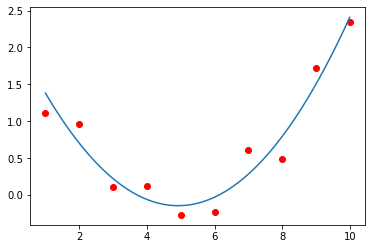

In [9]:
h = {1: 1.110,  2: 0.961, 3: 0.104, 4: 0.121, 5: -0.274, 
     6: -0.230, 7: 0.611, 8: 0.487, 9: 1.718, 10: 2.341}
ph = projection(h)

# Test that ph is a function
from types import FunctionType
assert type(ph) == FunctionType, "Error: ph should be a function"

x = np.array(range(1, 11))
hx = [] # Construct the image of x under h
for i in h:
    hx.append(h[i])
plt.plot(x, hx, "or") # Plot h(i)

x = np.linspace(1,10)
phx = [] # Construct the image of x under ph
for xi in x:
    phx.append(ph(xi))    
plt.plot(x,phx) # Plot the graph of ph(x)

plt.show()

Your output from the above should look like the following graph:
<img src="http://wphooper.com/teaching/2020-spring-computation/docs/least_squares.png" alt="Graph produced by successful test" title="Test result" width="375" height="252" />

## 4. Inside a union of disks

A radius $r>0$ and a center point $(a, b)$ determine a disk in the plane:
$$D_r(a,b) = \{(x,y):~(x-a)^2 + (x-b)^2 \leq r^2\}.$$

We'll use a dictionary mapping centers to radii to represent a finite union of disks. For example, a dictionary of the form:
$$\{(a_0,b_0): r_0, (a_1,b_1): r_1, ..., (a_{n-1},b_{n-1}): r_{n-1}\}$$
will represent the union of disks 
$$\bigcup_{j=0}^{n-1} D_{r_j}(a_j, b_j).$$

Write a function `inside(d, x, y)` which takes as input a dictionary `d` representing a finite union of disks as described above, and two numbers `x` and `y`. The function should return `True` if the point `(x,y)` lies in the union of disks and should return `False` if the point does not lie in the union.

**Solution:**

In [10]:
def inside(d, x, y):
    for pt in d:
        r = d[pt]
        a,b = pt
        if (x-a)**2 + (y-b)**2 <= r**2:
            return True
    return False

**Tests for your code:**

A test has been provided below with an accompanying figure of the disk union and points being tested.

In [11]:
d = {(0,0): 3, (3,0): 2}
assert inside(d, 2, 0), "The point (2, 0) should be inside."
assert inside(d, 1, -2), "The point (1, -2) should be inside."
assert inside(d, 4, 1), "The point (4, 1) should be inside."
assert not inside(d, 2, 2.8), "The point (2, 3) should be outside."
assert not inside(d, 2.3, 2), "The point (2.5, 2) should be outside."

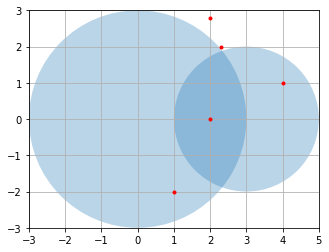

In [12]:
x = [2, 1, 4, 2, 2.3]
y = [0, -2, 1, 2.8, 2]
from matplotlib.patches import Circle
from matplotlib.transforms import Bbox
ax = plt.axes()
plt.xlim(-3,5)
plt.ylim(-3,3)
ax.set_aspect('equal')
for pt in d:
    r = d[pt]
    disk = Circle(pt, r)
    disk.set_alpha(0.3)
    ax.add_patch(disk)
plt.grid(True, linestyle='-')
plt.plot(x, y, ".r")
plt.show()

## 5. Eigenvalues and Eigenvectors of a matrix Y

The matrix $Y$ defined below has four distinct real eigenvalues. We'll denote the largest eigenvalue by $\lambda$. It turns out that $-\lambda$ is also an eigenvalue, and all other eigenvalues lie in the open interval $(-\lambda, \lambda)$. 

In [13]:
Y = np.array([[  -1.,    0.,    8.,   -4.],
              [  11.,    8.,  -30.,   12.],
              [  26.,   18.,  -55.,   20.],
              [  51.,   36., -126.,   48.]])

Write a function `eigenpair(epsilon)` which takes as input a postive floating point number `epsilon`. The function should apply an iterative method (such as the power method) to find approximations for $\lambda$ and the associated eigenvector $v$. Iteration should stop when successive approximations of $\lambda$ differ in absolute value by less than `epsilon`. A pair $(\lambda, v)$ consisting of the approximation of $\lambda$ and the approximation of $v$ should be returned. 

Hint: How can you apply a shift to make $v$ a dominant eigenvector?

**Solution:**

In [14]:
def eigenpair(epsilon):
    Z = Y + np.identity(4)
    # We use the power method for Z, which is a shift of Y.
    
    x0 = 2*random.random_sample(4) - 1
    x0 = x0 / np.linalg.norm(x0)
    eigenvalue_old = x0 @ Z @ x0
    temp = Z @ x0
    k = 1
    xk = temp / np.linalg.norm(temp)
    eigenvalue_new = xk @ Z @ xk
    while abs(eigenvalue_new - eigenvalue_old) > epsilon:
        eigenvalue_old = eigenvalue_new
        temp = Z @ xk
        k += 1
        xk = temp / np.linalg.norm(temp)
        eigenvalue_new = xk @ Z @ xk
    # We need to shift the eigenvalue of Z back
    # by one to get the corresponding eigenvalue
    # of Y.
    return (eigenvalue_new-1, xk)

**Tests for your code:**

In [15]:
lam,vec = eigenpair(10**-5)
diff = (Y @ vec) - (lam * vec)
print("The difference between Y*v and lambda*v is {}".format(diff))
assert (abs(diff) < 10**-5).all(), \
    "The pair returned is not close to an eigenpair."

The difference between Y*v and lambda*v is [-4.14806880e-07  3.87764748e-07 -4.88832141e-07 -3.34795303e-10]


## 6. Finding an eigenvalue close to -3

The matrix $A$ below has a real eigenvalue $\lambda$ which is very close to $-3$.

In [16]:
A = np.array([[ 4,  1,  2, 4],
              [-2,  4, -1, 2],
              [ 1, -2,  3, 4],
              [ 3,   4, 2, 1]
             ])

We define $B = (A+3I)^{-1}$. This matrix is approximately given below.

In [17]:
B = np.array([[-0.36363636, -0.54545455, -0.27272727,  0.90909091],
              [-0.81818182, -0.72727273, -0.36363636,  1.54545455],
              [-1.40909091, -1.36363636, -0.43181818,  2.52272727],
              [ 1.79545455,  1.81818182,  0.78409091, -3.23863636]])

Use powers of $B$ to compute the eigenvalue `lambda_A` of $A$ which is closest to $-3$. Store the associated eigenvector in `eigenvector_A`. Both quantities should be correct to six decimal places.

**Solution:**

Suppose $A v = \lambda v$ with $\lambda$ very close to $-3$. Then $(A +3 I)v=(\lambda+3) v$, and $\lambda+3$ will be very close to zero. We will also have $(A +3 I)^{-1} v=\frac{1}{\lambda+3} v$ and $\frac{1}{\lambda+3}$ will be very large. Thinking carefully about this, we are looking for the dominant eigenvalue eigenvector pair for $B$. So, we can use the power method.

In [18]:
x = 2*np.random.random_sample(4) - 1
k = 0
x_k = x / np.linalg.norm(x)
eigenvalue_B = x_k @ B @ x_k
eigenvalue_old = float("+inf") # infinity
while abs(eigenvalue_B - eigenvalue_old) > 10**-8:
    temp = B @ x_k
    k += 1
    x_k = temp / np.linalg.norm(temp)
    eigenvalue_old = eigenvalue_B
    eigenvalue_B = x_k @ B @ x_k
print("we found an eigenvector {} with eigenvalue {}.". \
      format(x_k, eigenvalue_B))

we found an eigenvector [ 0.20839345  0.33860364  0.55003403 -0.73442652] with eigenvalue -5.173589124867122.


In [19]:
# Check eigenvalue equation
B @ x_k -  eigenvalue_B*x_k

array([ 4.90931074e-10,  1.29314337e-10, -4.69481787e-10, -1.52686752e-10])

That looks good. Now we have
$$\frac{1}{\lambda_A+3} = \lambda_B,$$
Thus $\lambda_A = \frac{1}{\lambda_B} - 3.$$

In [20]:
lambda_A = 1/eigenvalue_B - 3
eigenvector_A = x_k

In [21]:
# Check
A @ eigenvector_A - lambda_A * eigenvector_A

array([-2.62880606e-10,  4.62614969e-09, -5.86941118e-09,  1.00322639e-09])

Looks good!

## 7. Finding a final eigenvalue

The matrix $C$ below has four distinct eigenvalues. Three of them are given below (correct to several digits of accuracy). Find the fourth and store the result in `eigvalue_3` to approximately the same accuracy.

In [22]:
C = np.array([[ 5,  1,  2, 4],
              [-2,  4, -1, 2],
              [ 1, -2,  3, 4],
              [ 3,   4, 2, 10]
             ])
eigvalue_0 = 12.92391499
eigvalue_1 = 1.23951179
eigvalue_2 = 1.60202972

**Solution:**

The sum of the eigenvalues is the trace, and the trace is the sum of the diagonal entries.

In [23]:
trace = 0.0
for i in range(4):
    trace += C[i,i]
trace

22.0

In [24]:
eigvalue_3 = trace - eigvalue_0 - eigvalue_1 - eigvalue_2
eigvalue_3

6.2345435

## 8. Shifting polynomials

Recall that a polynomial 
$$p(x) = \sum_{k=0}^d c_k x^k$$
can be represented by a dictionary with one entry for every non-zero coefficient. The dictionary representing $p$ would then map a degree $k$ with a non-zero $c_k$ to the floating point number $c_k$. For example `{9:3.0, 7:2.0}` would represent $3 x^9 + 2x^7$.


Write a function `shift(p, t)` which takes as input a dictionary `p` representing a polynomial $p(x)$ and a floating point real number $t$. The function should return the dictionary representing the polynomial
$$q(x) = p(x+t).$$

*Help:* To do this, you need to know the coefficients of $(x+t)^k$. We have
$$(x+t)^k = \sum_{i=0}^k \binom{k}{i} t^{k-i} x^i.$$
The binomial coefficient $\binom{k}{i}$ can be computed using the `binom` function from the `scipy.special` package. For example, $\binom{4}{2}=6$ and this can be seen using the following python code:
```
from scipy.special import binom
binom(4, 2)
```

**Solution:**

First consider the math. Suppose $p(x) = \sum_{k=0}^d c_k x^k$. Then
$$q(x) = p(x+t) = \sum_{k=0}^d c_k (x+t)^k.$$
Using the formula for $(x+t)^k$ we see that
$$q(x) = \sum_{k=0}^d c_k \sum_{i=0}^k \binom{k}{i} t^{k-i} x^i = \sum_{k=0}^d \sum_{i=0}^k c_k \binom{k}{i} t^{k-i} x^i.$$

In [25]:
from scipy.special import binom

def shift(p, t):
    q = {} # intitially an empty dictionary
    for k in p:
        ck = p[k]
        for i in range(k+1):
            coef = ck * binom(k, i) * t**(k-i)
            # The following if statement adds coef*x^i to q.
            if i in q:
                q[i] += coef
            else:
                q[i] = coef
    # Now if we have any zero coefficients, we remove them
    # We can't change the keys of a dictionary we are interating though,
    # so we convert the keys to a list first.
    l = list(q.keys())
    for k in l:
        if q[k] == 0.0:
            del q[k]
    return q

**Tests for your code:**

If $p$ is given below:
$$p(x) = x^2 + 3x$$
then $q(x)$ will have the form:
$$q(x) = p(x+t) = (x+t)^2 + 3(x+t).$$
Simplifying we see that
$$q(x) = (x^2+ 2 tx + t^2) + (3x+3t)$$
and
$$q(x) = 1 x^2 + (2t + 3) x + (t^2 + 3t).$$

In [26]:
p = {2:1, 1:3} 
for t in range(1, 10):
    expected_q = {2:1, 1:2*t+3, 0:t**2+3*t}
    q = shift(p, t)
    assert q == expected_q, f'Error when t={t}'